In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [30]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB
None


In [31]:
# Display descriptive statistics of the numerical features
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08  


In [12]:
# Check for missing values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


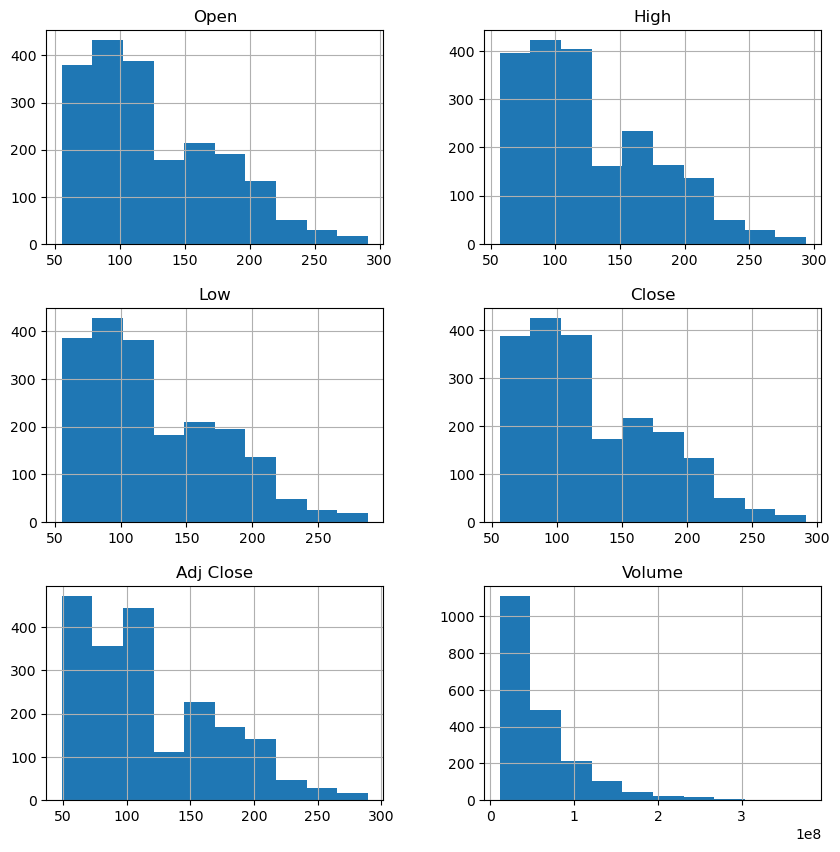

In [32]:
#data visulization
# Explore data distribution using histograms
df.hist(figsize=(10, 10))
plt.show()

<Axes: >

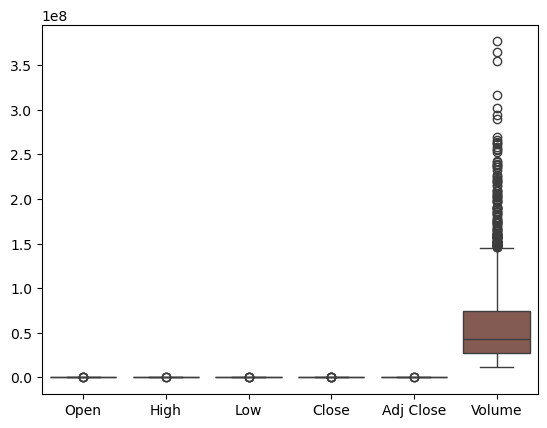

In [33]:
#data visulization using the boxplot
# boxplot detect the outlaiers
sns.boxplot(df)

In [34]:
numerical_columns=df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

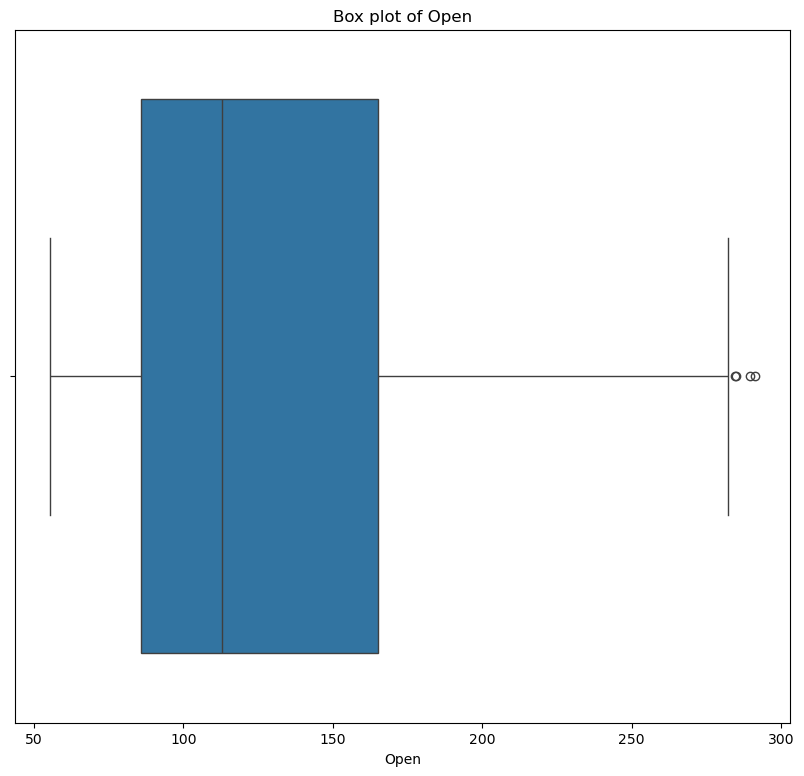

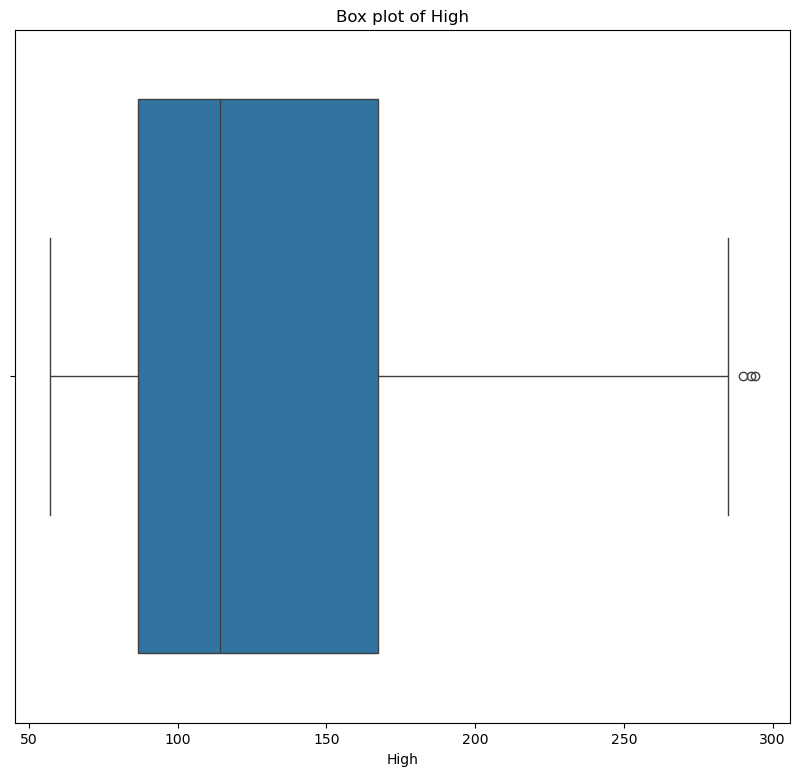

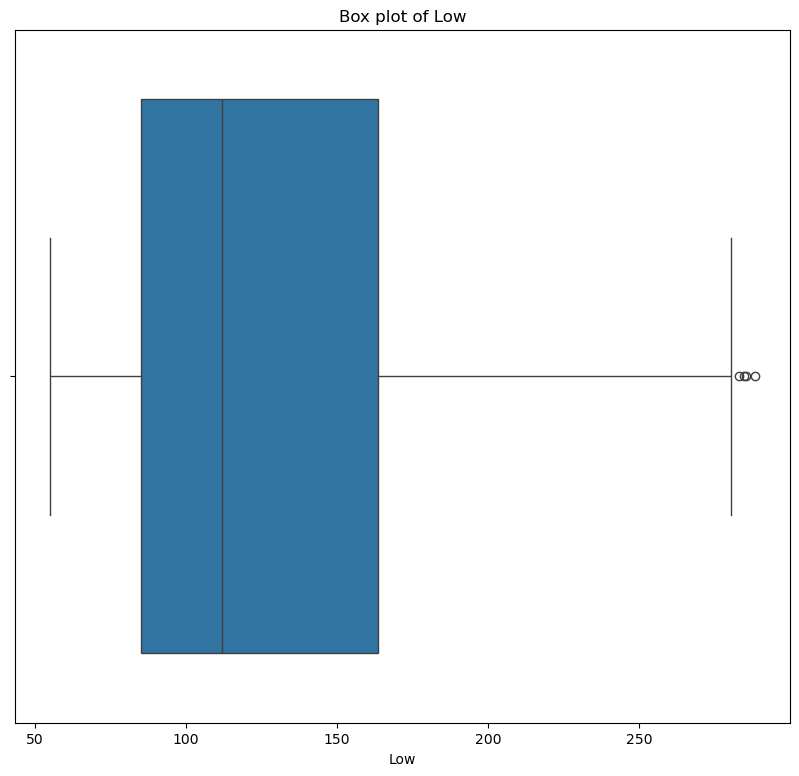

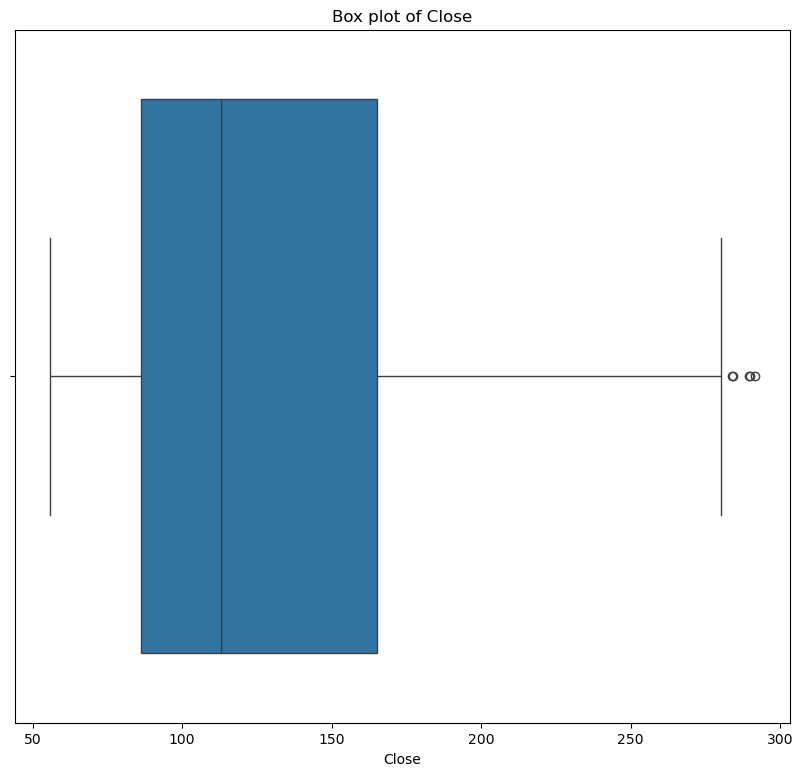

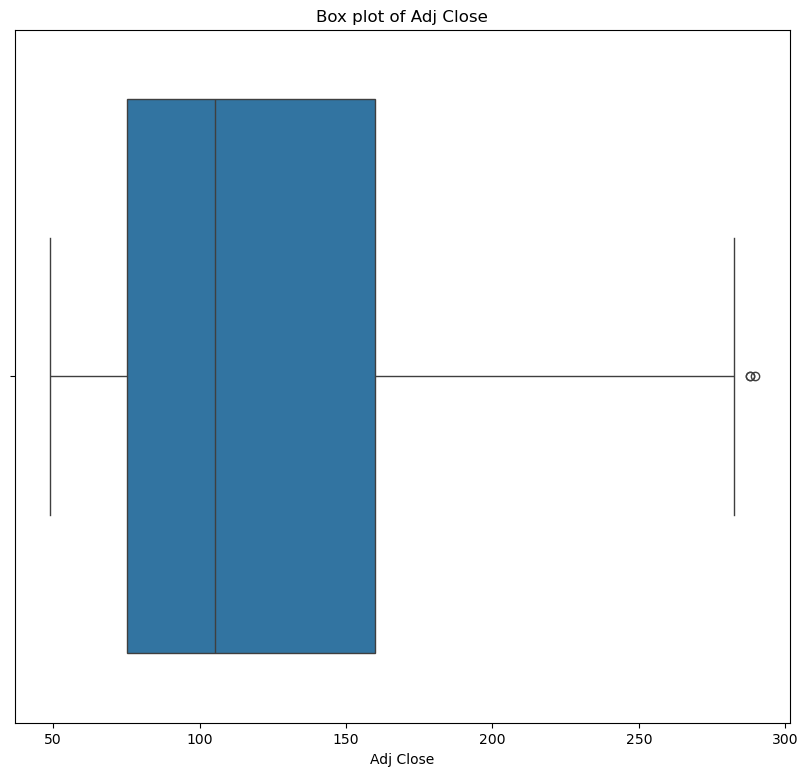

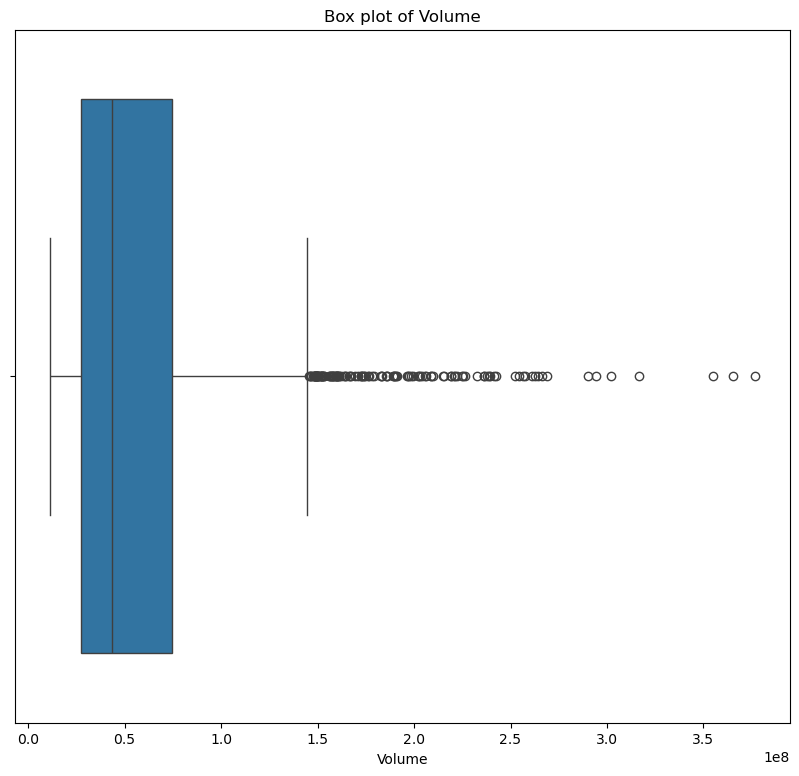

In [35]:
for column in numerical_columns:
    plt.figure(figsize=(10,9))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

In [36]:
# Identify outliers using IQR method
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [37]:
outlier_detection(data,'Close')

(-32.36214249999999, 283.8092895, 86.2021445, 165.2450025)

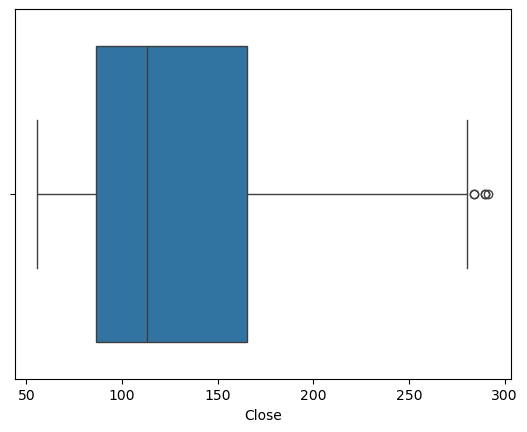

In [38]:
sns.boxplot(x=df['Close'])
plt.show()

In [39]:
# Handle the outlayers
df[df['Volume']>1.5]
df.loc[df['Volume']>1.5,'Volume'] = 1.5
df[df['Open'] > 284.1507185]
df.loc[df['Open']>284.1507185,'Open'] = 284.1507185
df[df['High']>288.44820374999995]
df.loc[df['High']>288.44820374999995,'High'] = 288.44820374999995
df[df['Low']>280.97784824999997]
df.loc[df['Low']>280.97784824999997,'Low'] = 280.97784824999997
df[df['Close']>283.8092895]
df.loc[df['Close']>283.8092895,'Close'] = 283.8092895
df[df['Adj Close']>287.532761]
df.loc[df['Adj Close']>287.532761,'Adj Close'] = 287.532761

C:\Users\dell\AppData\Local\Temp\ipykernel_12164\4101897766.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Volume']>1.5,'Volume'] = 1.5


<Axes: >

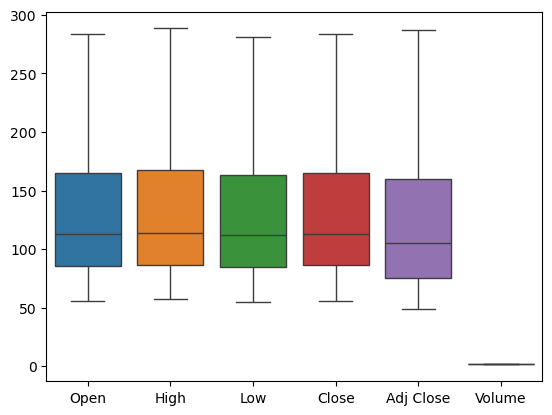

In [40]:
sns.boxplot(df)

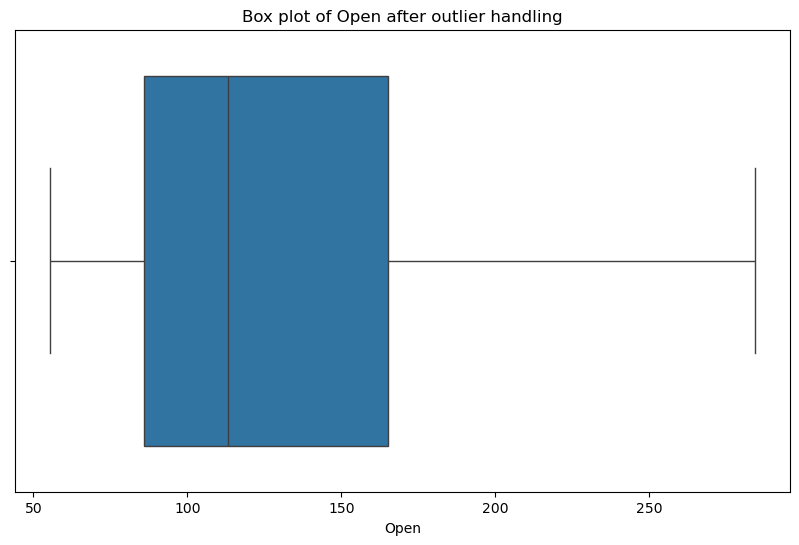

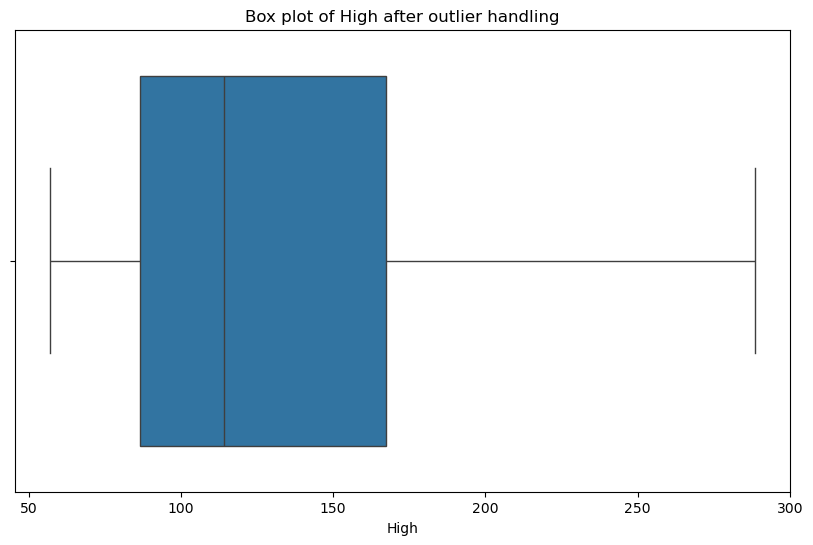

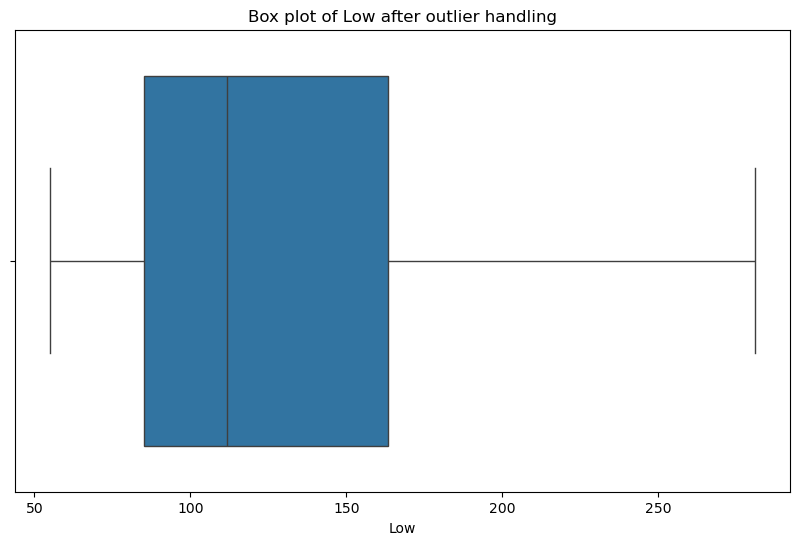

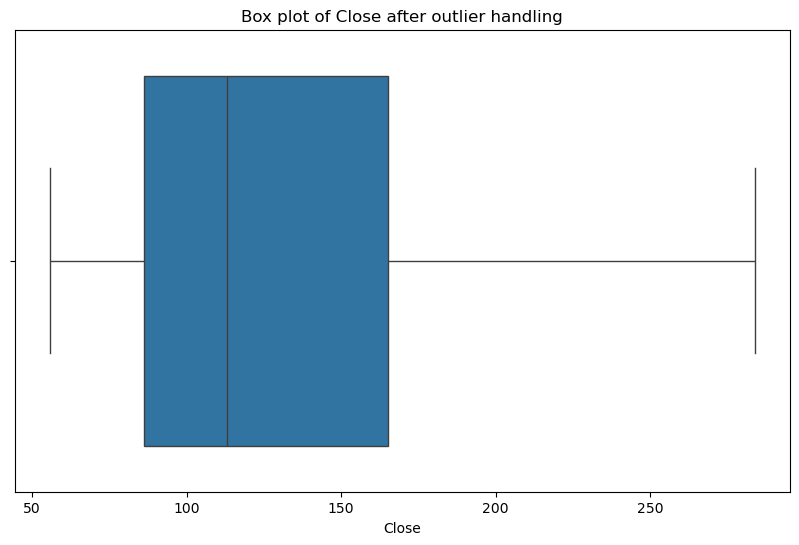

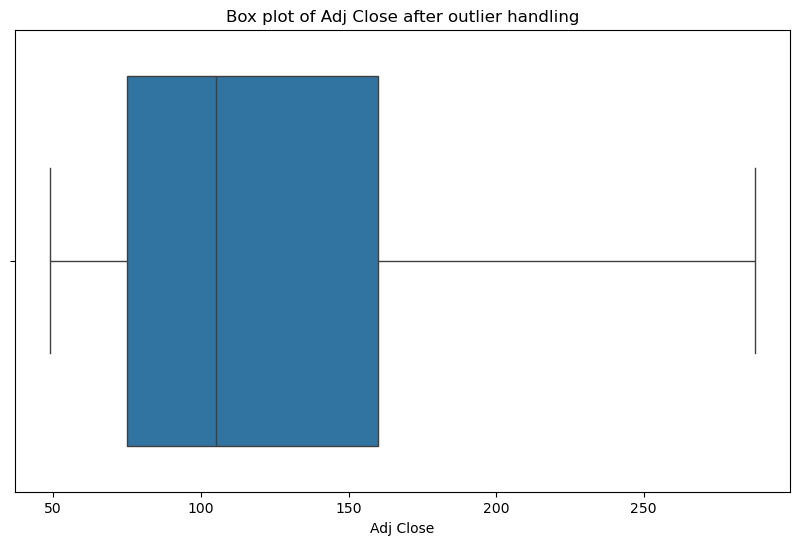

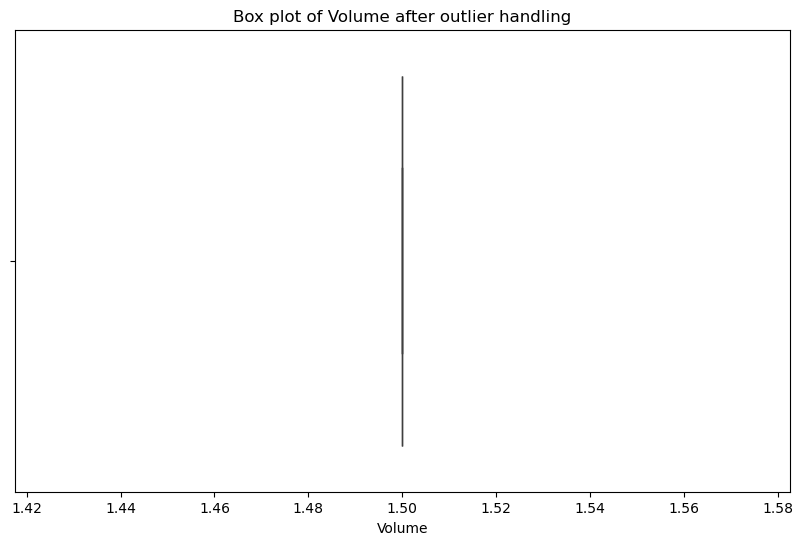

In [42]:
# Visualize the box plot after handling outliers for all numerical columns
for column in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Box plot of {column} after outlier handling')
  plt.show()

<Axes: >

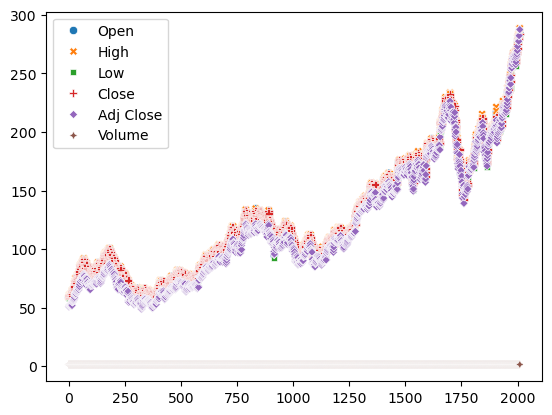

In [45]:
# scatter plot
sns.scatterplot(df)


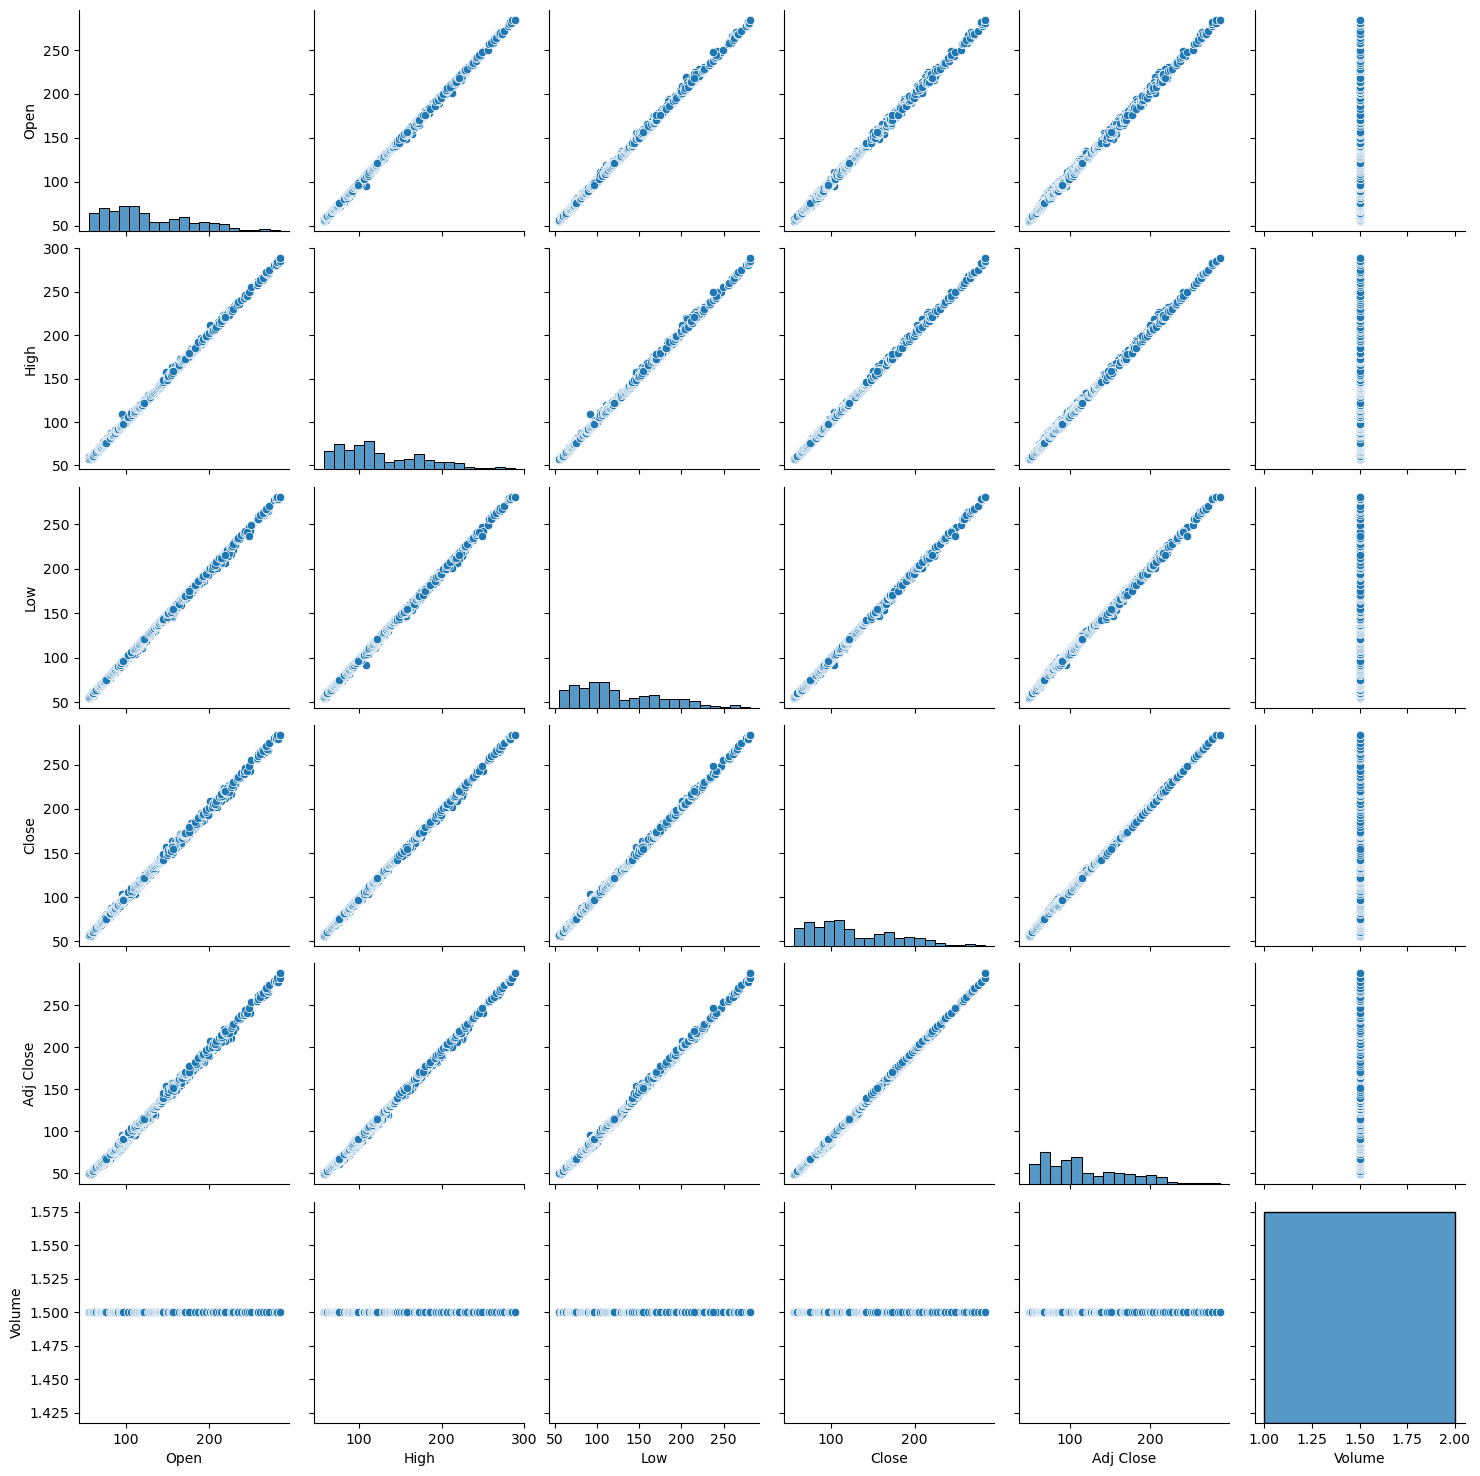

In [48]:
# Pair plot
sns.pairplot(df)

<Axes: >

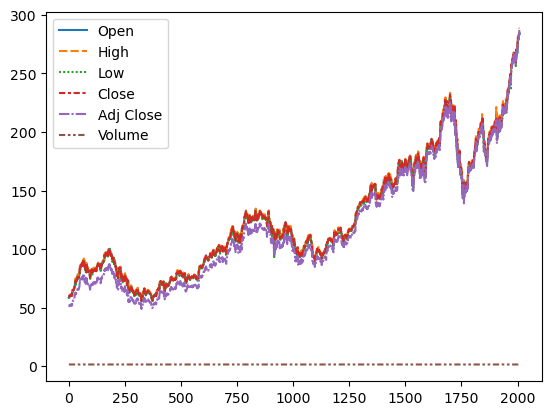

In [49]:
# Line plot
sns.lineplot(df)

In [50]:
# Calculate the correlation matrix
correlation=df.corr(numeric_only=True)

# Display the correlation matrix
print(correlation)


               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.999782  0.999719  0.999498   0.998891     NaN
High       0.999782  1.000000  0.999656  0.999747   0.999170     NaN
Low        0.999719  0.999656  1.000000  0.999771   0.999173     NaN
Close      0.999498  0.999747  0.999771  1.000000   0.999395     NaN
Adj Close  0.998891  0.999170  0.999173  0.999395   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


<Axes: >

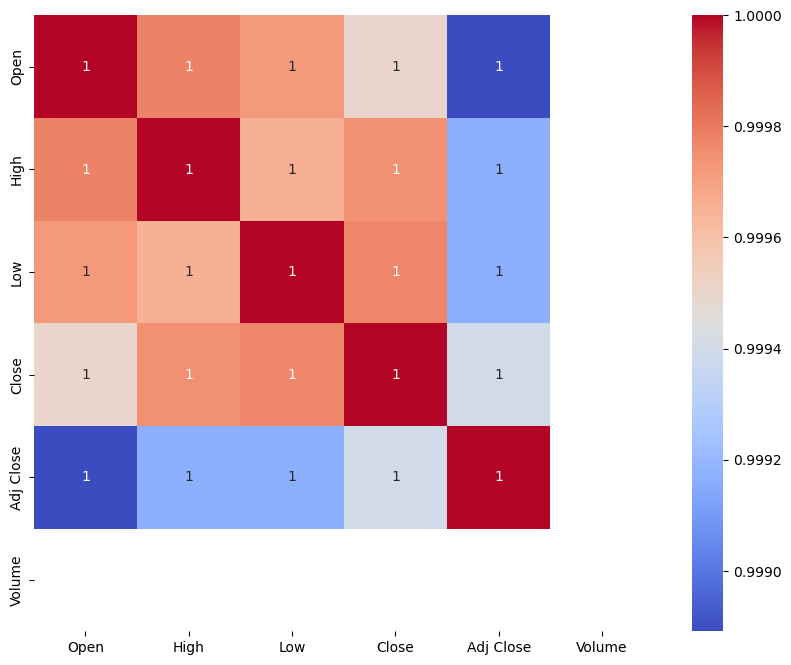

In [51]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')